In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
import pandas as pd

In [0]:
test=pd.read_csv('http://bit.ly/2D0fIXJ')

In [4]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [0]:
train=pd.read_csv('http://bit.ly/2Rcj11j')

In [6]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [7]:
print(train.shape)
print(test.shape)

(1456, 24)
(416, 24)


In [8]:
train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [10]:
train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [0]:
label=pd.read_csv('http://bit.ly/2z6GIAP')

In [12]:
label.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [13]:
label.shape

(1456, 4)

In [0]:
merge=pd.merge(train, label)

In [15]:
merge.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [16]:
merge.shape

(1456, 25)

In [27]:
merge['city'].value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [28]:
merge['year'].value_counts()

2001    104
2003    104
2002    104
2007    104
2006    104
2005    104
2004    104
2000     78
2008     69
1991     52
2009     52
1999     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1990     35
2010     26
Name: year, dtype: int64

In [0]:
dff=merge[merge['city']=='sj']['total_cases'].value_counts()

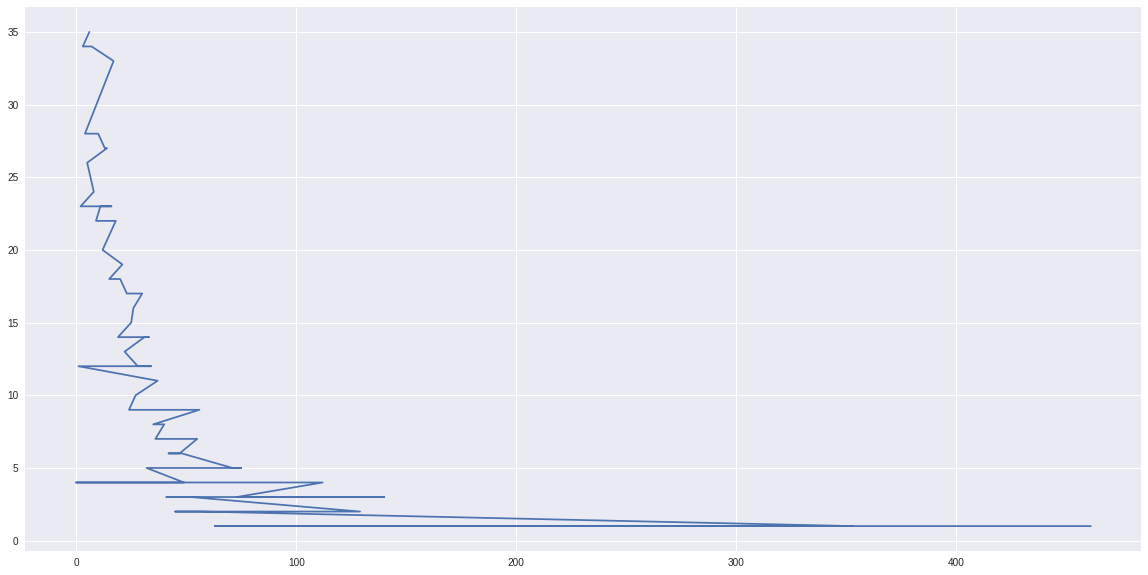

In [51]:
dff.plot(kind='line', stacked=True, figsize=(20,10))

In [40]:
df.value_counts()

1     49
2     13
4     13
3      9
5      7
12     4
23     3
6      3
14     3
8      3
27     2
28     2
22     2
18     2
17     2
7      2
34     2
9      2
10     1
35     1
11     1
13     1
16     1
19     1
20     1
24     1
26     1
33     1
15     1
Name: total_cases, dtype: int64

In [0]:
df1=merge[merge['year']==2001]['total_cases'].value_counts()

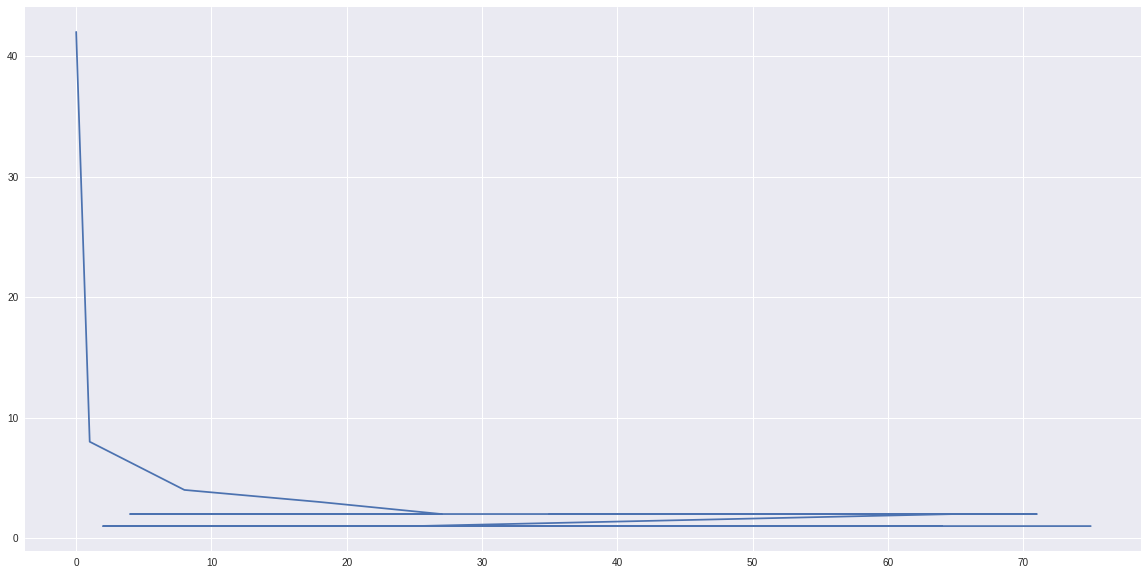

In [48]:
df1.plot(kind='line', stacked=True, figsize=(20,10))

In [52]:
dff.sum()

936

In [56]:
df1.max()

42

In [0]:
X=merge[merge['city']=='sj']

In [61]:
merge.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [62]:
merge['ndvi_ne'].mean()

0.1422935374167987

In [63]:
merge['ndvi_ne'].std()

0.14053115314639272

In [0]:
import numpy as np

In [0]:
merge['ndvi_ne'].fillna(merge['ndvi_ne'].mean(), inplace=True)

In [67]:
merge['ndvi_ne'].isnull().value_counts()

False    1456
Name: ndvi_ne, dtype: int64

In [0]:
merge['ndvi_nw'].fillna(merge['ndvi_nw'].mean(), inplace=True)

In [0]:
merge['ndvi_se'].fillna(merge['ndvi_se'].mean(), inplace=True)

In [0]:
merge['ndvi_sw'].fillna(merge['ndvi_sw'].mean(), inplace=True)

In [0]:
merge['precipitation_amt_mm'].fillna(merge['precipitation_amt_mm'].mean(), inplace=True)

In [0]:
merge['reanalysis_air_temp_k'].fillna(merge['reanalysis_air_temp_k'].mean(), inplace=True)

In [0]:
merge['reanalysis_avg_temp_k'].fillna(merge['reanalysis_avg_temp_k'].mean(), inplace=True)

In [0]:
merge['reanalysis_dew_point_temp_k'].fillna(merge['reanalysis_dew_point_temp_k'].mean(), inplace=True)

In [0]:
merge['reanalysis_max_air_temp_k'].fillna(merge['reanalysis_max_air_temp_k'].mean(), inplace=True)

In [0]:
merge['reanalysis_min_air_temp_k'].fillna(merge['reanalysis_min_air_temp_k'].mean(), inplace=True)

In [0]:
merge['reanalysis_precip_amt_kg_per_m2'].fillna(merge['reanalysis_precip_amt_kg_per_m2'].mean(), inplace=True)

In [0]:
merge['reanalysis_relative_humidity_percent'].fillna(merge['reanalysis_relative_humidity_percent'].mean(), inplace=True)

In [0]:
merge['reanalysis_sat_precip_amt_mm'].fillna(merge['reanalysis_sat_precip_amt_mm'].mean(), inplace=True)

In [0]:
merge['reanalysis_specific_humidity_g_per_kg'].fillna(merge['reanalysis_specific_humidity_g_per_kg'].mean(), inplace=True)

In [0]:
merge['reanalysis_tdtr_k'].fillna(merge['reanalysis_tdtr_k'].mean(), inplace=True)

In [0]:
merge['station_avg_temp_c'].fillna(merge['station_avg_temp_c'].mean(), inplace=True)

In [0]:
merge['station_diur_temp_rng_c'].fillna(merge['station_diur_temp_rng_c'].mean(), inplace=True)

In [0]:
merge['station_max_temp_c'].fillna(merge['station_max_temp_c'].mean(), inplace=True)

In [0]:
merge['station_min_temp_c'].fillna(merge['station_min_temp_c'].mean(), inplace=True)

In [0]:
merge['station_precip_mm'].fillna(merge['station_precip_mm'].mean(), inplace=True)

In [87]:
merge.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre